In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [9]:
data = pd.read_excel("D:\__Study__\CluseterTerm\StatLab\Сдать графики\\ans_1.xlsx")
data = data[["Левая","Правая"]]
print(data)
left_val = data[['Левая']].to_numpy()
right_val = data[['Правая']].to_numpy()

    Левая  Правая
0    32.5    32.5
1    32.8    31.9
2    31.2    31.6
3    31.5    32.0
4    30.1    30.3
..    ...     ...
56   33.4    33.7
57   33.7    33.3
58   34.7    34.6
59   33.8    34.5
60   33.8    33.7

[61 rows x 2 columns]


In [10]:
# Добавить константу к правым измерениям
right_vals_with_const = sm.add_constant(data['Правая'])

# Построить модель линейной регрессии
model = sm.OLS(data['Левая'], right_vals_with_const).fit()

# Вывести параметры модели
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Левая   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     308.6
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           4.10e-25
Time:                        16:09:59   Log-Likelihood:                -56.518
No. Observations:                  61   AIC:                             117.0
Df Residuals:                      59   BIC:                             121.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7449      1.697      1.618      0.1

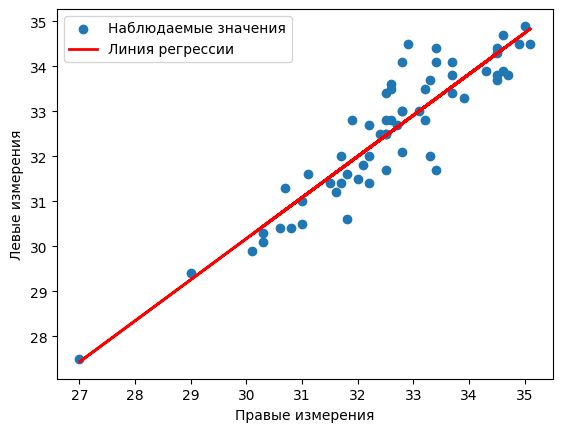

In [11]:
# Построить облако наблюдаемых значений
plt.scatter(data['Правая'], data['Левая'], label='Наблюдаемые значения')

# Построить линию регрессии
plt.plot(data['Правая'], model.predict(right_vals_with_const), color='red', linewidth=2, label='Линия регрессии')

plt.xlabel('Правые измерения')
plt.ylabel('Левые измерения')
plt.legend()
plt.show()

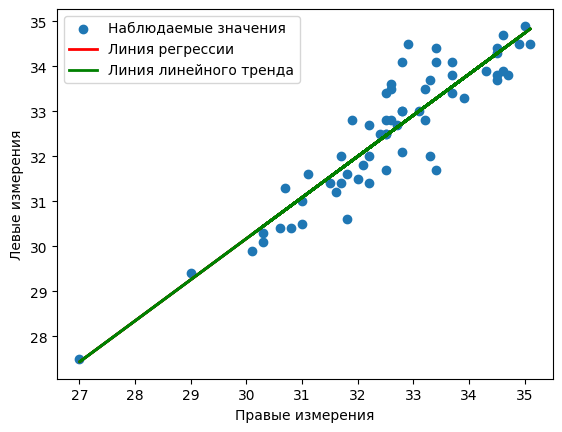

Уравнение регрессии: Левые = 2.74 + 0.91 * Правые
Уравнение линейного тренда: Левые = 2.74 + 0.91 * Правые


In [12]:
# Получить коэффициенты регрессии
intercept, slope = model.params['const'], model.params['Правая']

# Построить график с облаком наблюдаемых значений и линией регрессии
plt.scatter(data['Правая'], data['Левая'], label='Наблюдаемые значения')
plt.plot(data['Правая'], model.predict(right_vals_with_const), color='red', linewidth=2, label='Линия регрессии')

# Построить линию линейного тренда
plt.plot(data['Правая'], slope * data['Правая'] + intercept, color='green', linewidth=2, label='Линия линейного тренда')

plt.xlabel('Правые измерения')
plt.ylabel('Левые измерения')
plt.legend()
plt.show()

# Вывести уравнения линий
print(f"Уравнение регрессии: Левые = {intercept:.2f} + {slope:.2f} * Правые")
print(f"Уравнение линейного тренда: Левые = {intercept:.2f} + {slope:.2f} * Правые")
